**_Section 12.0:_** Load packages

In [1]:
import pandas as pd
import json
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from os import system 
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb

%matplotlib inline

/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### _Section 12.1_
```diff
+ The following section gives the student the opportunity to use a decision tree model available via Scikit-Learn.
```
### Predicting Evergreen-ness of Content with Decision Trees and Random Forests
#### DATA DICTIONARY
Read in the .tsv (tab separated value) file

In [2]:
data = pd.read_csv("./datasets/stumbleupon.tsv", sep='\t')

# Look at first 1000 characters of first row in data['boilerplate'] column
print(data['boilerplate'][0][:1000]) 

{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose 

In [3]:
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


### _Section 12.2_
### Predicting 'Evergreen-ness' Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

#### What are 'evergreen' sites?

> Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> A sample of URLs is below, where label = 1 are 'evergreen' websites

In [4]:
for i in range(5):
    print(data['url'].loc[i])
    print(data['title'].loc[i])
    print(data['label'].loc[i])

http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html
IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries
0
http://www.popsci.com/technology/article/2012-07/electronic-futuristic-starting-gun-eliminates-advantages-races
The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races
1
http://www.menshealth.com/health/flu-fighting-fruits?cm_mmc=Facebook-_-MensHealth-_-Content-Health-_-FightFluWithFruit
Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health
1
http://www.dumblittleman.com/2007/12/10-foolproof-tips-for-better-sleep.html
10 Foolproof Tips for Better Sleep 
1
http://bleacherreport.com/articles/1205138-the-50-coolest-jerseys-you-didnt-know-existed?show_full=
The 50 Cool

### _Section 12.3_
### Group Exercises

> ### Exercise: 1. In a group: Brainstorm 3 - 5 features you could develop that would be useful for predicting evergreen websites
> ###  Exercise: 2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?
- i.e. If you believe high-image content websites are likely to be evergreen, how can you build a feature that represents that?
- i.e. If you believe weather content is likely NOT to be evergreen, how might you build a feature that represents that?

### _Section 12.4_  Independent Exercises
#### Split up and develop 1-3 of the those features independently
- Take the features that you brainstormed collectively and explore their predictive power independently

> ### Exercise: 3. Does being a news site affect evergreen-ness? 
Compute or plot the percentage of news related evergreen sites

In [5]:
data[['is_news']].head()

,is_news
0,1
1,1
2,1
3,1
4,1


In [6]:
data.groupby(['is_news'])[['is_news']].head()

,is_news
0,1
1,1
2,1
3,1
4,1
5,?
7,?
9,?
11,?
13,?


In [7]:
data.groupby(['is_news'])[['label']].head()

,label
0,0
1,1
2,1
3,1
4,0
5,0
7,0
9,1
11,0
13,1


In [8]:
# Option 1: Find out P ( evergreen | is_news = 1) vs P ( evergreen | is_news = ?)
data.groupby(['is_news'])[['label']].mean()

## Alternatively:
# sb.factorplot(x='is_news', 
#               y='label',
#               kind='bar',
#               data = data)


,label
is_news,
1,0.516916
?,0.507562


### Exercise: 4. Does category in general affect evergreen-ness? 
Plot the rate of evergreen sites for all Alchemy categories

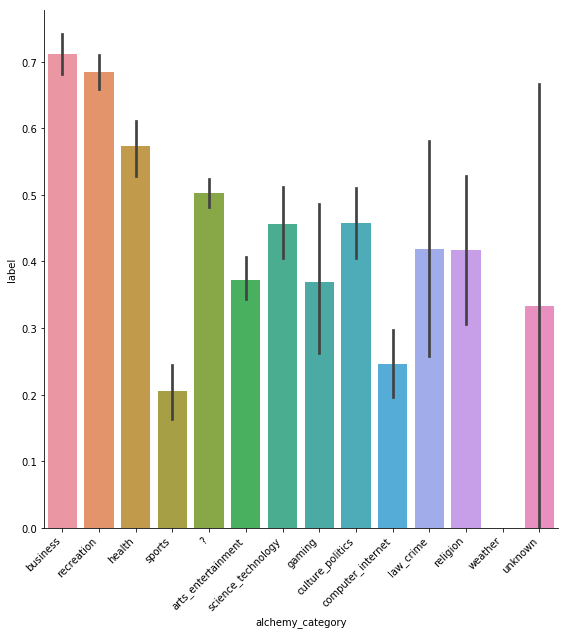

In [9]:
data.groupby(['alchemy_category'])[['label']].mean()

##  OR

p = sb.factorplot(x='alchemy_category', 
              y='label',
              kind='bar',
              data = data,
              size = 8
            )

p.set_xticklabels(rotation=45, horizontalalignment='right')

### Exercise: 5. How many articles are there per category?

                    label
alchemy_category         
?                    2342
arts_entertainment    941
business              880
computer_internet     296
culture_politics      343
gaming                 76
health                506
law_crime              31
recreation           1229
religion               72
science_technology    289
sports                380
unknown                 6
weather                 4


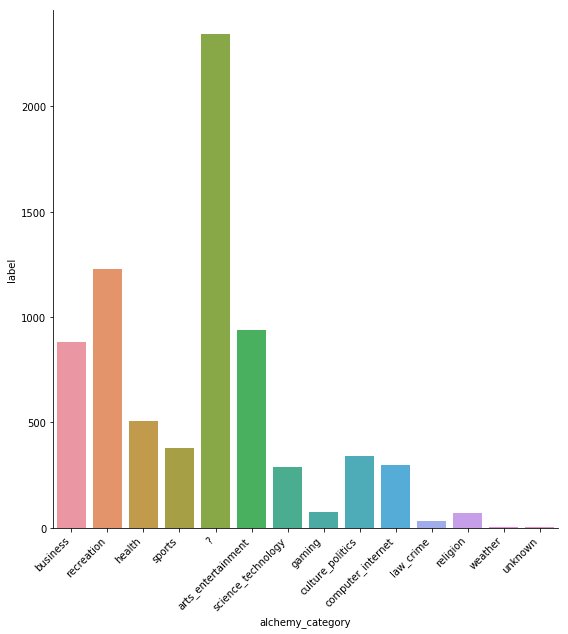

In [10]:
print(data.groupby(['alchemy_category'])[['label']].count())

##  OR

p = sb.factorplot(x='alchemy_category', 
              y='label',
              kind='bar',
              data = data,
              size = 8,
              estimator=len
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

> #### Let's try extracting some of the text content.
> ### Exercise: 6. Create a feature for the title containing 'recipe'. 
Is the % of evegreen websites higher or lower on pages that have recipe in the the title?

In [11]:
# Option 1: Create a function to check for this
def has_recipe(text_in):
    try:
        if 'recipe' in str(text_in).lower():
            return 1
        else:
            return 0
    except: 
        return 0
        
data['recipe'] = data['title'].map(has_recipe)

# Option 2: lambda functions
#data['recipe'] = data['title'].map(lambda t: 1 if 'recipe' in str(t).lower() else 0)

# Option 3: string functions
#data['recipe'] = data['title'].str.contains('recipe')

### _12.5_ Decision Trees in scikit-learn
**Demo:** Build a decision tree model to predict the "evergreen-ness" of a given website

In [12]:
model = DecisionTreeClassifier()

X = data[['image_ratio', 'html_ratio', 'recipe', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)
    
# Fit the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns,
                   filled=True, rounded=True)

    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

**Exercise:** Evaluate the decision tree using cross-validation; use AUC as the evaluation metric

In [13]:
# use cross_val_score()

# ... #

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.54839181 0.57479139 0.5850818  0.57819225 0.55129361], Average AUC 0.567550171916


### _12.6_ Adjusting Decision Trees to Avoid Overfitting
**Demo:** Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [14]:
model = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)

model.fit(X, y)
build_tree_image(model)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.62911915 0.61866582 0.65810826 0.63349894 0.62723443], Average AUC 0.633325320283


Notice the greater AUC for the adjusted model - _very exciting!_

### _12.7_   Random Forest Models
**Demo:** Build a random forest model to predict the evergreen-ness of a website

In [15]:
model = RandomForestClassifier(n_estimators = 20)

model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Demo:** Extracting importance of features

In [16]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,html_ratio,0.495286
0,image_ratio,0.415683
2,recipe,0.089031


**Exercise:** Evaluate the Random Forest model using cross-validation
- increase the number of estimators and view how that improves predictive performance

In [17]:
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [0.6144971  0.63436825 0.6240754 ], Average AUC 0.624313583411
n trees: 1, CV AUC [0.55315363 0.57757411 0.57127679], Average AUC 0.567334844264
n trees: 11, CV AUC [0.61625954 0.62983136 0.62387662], Average AUC 0.623322506031
n trees: 21, CV AUC [0.60865028 0.63263274 0.62033875], Average AUC 0.620540590292
n trees: 31, CV AUC [0.61488974 0.64181588 0.6269523 ], Average AUC 0.627885974301
n trees: 41, CV AUC [0.61117957 0.64280204 0.62832268], Average AUC 0.627434763441
n trees: 51, CV AUC [0.61626514 0.63882477 0.62826268], Average AUC 0.627784197217
n trees: 61, CV AUC [0.61107721 0.64035145 0.6261997 ], Average AUC 0.625876119887
n trees: 71, CV AUC [0.61959387 0.64117819 0.63187439], Average AUC 0.630882149421
n trees: 81, CV AUC [0.6139636  0.64176581 0.63251326], Average AUC 0.62941422331
n trees: 91, CV AUC [0.61655049 0.6448363  0.62908946], Average AUC 0.630158747822


In [18]:
# Could also be accomplished with grid_search
from sklearn import grid_search

n_trees = range(1, 100, 10)
gs = grid_search.GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={'n_estimators': n_trees},
    scoring='roc_auc')

gs.fit(X, y)

print(gs.param_grid) # Parameter space explored
print(gs.best_score_) # Best 'neg_mean_squared_error'
print(gs.best_estimator_) # Best combination of paramaters

/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]}
0.630384736324
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### _Section 12.8_ 
#### Independent Practice: Evaluate Random Forest Using Cross-Validation
1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the _importance_ of the feature (using __'model.feature\_importances_'__)
3. **Bonus**: Just like the 'recipe' feature, add in similar text features and evaluate their performance.

In [19]:
data.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,...,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,recipe
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.00000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,...,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320,0.12522
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,...,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856,0.33099
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,...,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,...,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000,0.00000
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,...,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000,0.00000
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,...,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000,0.00000
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,...,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000,1.00000


In [20]:
## 1. Building a model with more relevant features
model = RandomForestClassifier(n_estimators=50)

# Continue to add features to X
#     Build dummy features, include quantitative features, or add text features
X = data[['image_ratio', 'html_ratio', 'recipe', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)


## 2a. Evaluate predictive performance for the given feature set
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))


# 3 (BONUS): Adding in text features

# Check for keywords in the title
data['PhotoInTitle'] = data['title'].fillna('').str.lower().str.contains('photo').astype(int)
X = data[['image_ratio', 'html_ratio', 'recipe', 'PhotoInTitle', 'label']].dropna()
X.drop('label', axis=1, inplace=True)

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

# Check for keywords in the body
data['WeatherInBody'] = data['body'].fillna('').str.lower().str.contains('weather').astype(int)
X = data[['image_ratio', 'html_ratio', 'recipe', 'PhotoInTitle', 'WeatherInBody', 'label']].dropna()
X.drop('label', axis=1, inplace=True)

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))


data['CatInBody'] = data['body'].fillna('').str.lower().str.contains('cat').astype(int)
X = data[['image_ratio', 'html_ratio', 'recipe', 'PhotoInTitle', 'WeatherInBody', 'CatInBody', 'label']].dropna()
X.drop('label', axis=1, inplace=True)

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))


## 2b. Evaluating feature importances

# Fit a model on the whole dataset
model.fit(X, y)

# Get columns and their scores
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

CV AUC [0.61610124 0.63886858 0.62403815], Average AUC 0.626335987433
CV AUC [0.61141291 0.64351845 0.63154902], Average AUC 0.628826792712
CV AUC [0.61302659 0.63615152 0.63438834], Average AUC 0.627855482947
CV AUC [0.62390469 0.65993709 0.64583629], Average AUC 0.643226020483


,Features,Importance Score
1,html_ratio,0.493856
0,image_ratio,0.400588
2,recipe,0.088869
5,CatInBody,0.008291
3,PhotoInTitle,0.005326
4,WeatherInBody,0.003069
